# Trabalho Final - Análise de Dados com Python

Integrantes:

    1) Micael Costa Amorim - RM 340401 
    2) Rodrigo Albornoz - RM 340597
    3) Karolyne de Carvalho - RM 340494
    4) Vinicius Pereira Severo - RM 340384

### Enunciado

A partir dos dados housing.csv, realize toda análise exploratória necessária e prepare os dados para algoritmos de machine learning usando a Scikit-Learn. Treine um modelo de regressão linear que prediga a variável meta (median_house_value) e cujo valor de RMSE seja menor ou igual a 69000. 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rc('figure', figsize = (15,15))

In [2]:
housing = pd.read_csv('bases/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Verificando informações sobre as colunas

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Estatísticas descritivas das colunas

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
housing.describe(include=['O'])

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


### Distribuição do atributo meta (median_house_value) por faixa de valor

In [3]:
classes = [0, 50000, 100000, 300000, 500000, 1000000]
labels = ['0 - 50000', '50001 < 100000', '100001 < 300000', '300001 < 5000000', '5000001 < 1000000']
median_house_value_cat = pd.cut(housing['median_house_value'], bins=classes, labels=labels)
median_house_value_cat.value_counts()

100001 < 300000      13146
50001 < 100000        3448
300001 < 5000000      2871
5000001 < 1000000      965
0 - 50000              210
Name: median_house_value, dtype: int64

### Histograma de valores numéricos

In [8]:
def generate_graph(graph_type):
    attributes = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'median_income', 'median_house_value']
    figure = plt.figure() 
    for i in range(len(attributes)):
        attr = attributes[i]
        g = figure.add_subplot(3, 2, (i + 1))
        type_func_map = {
            'hist': g.hist,
            'boxplot': g.boxplot,
        }
        g.set_title(attr)
        type_func_map[graph_type](housing[attr])

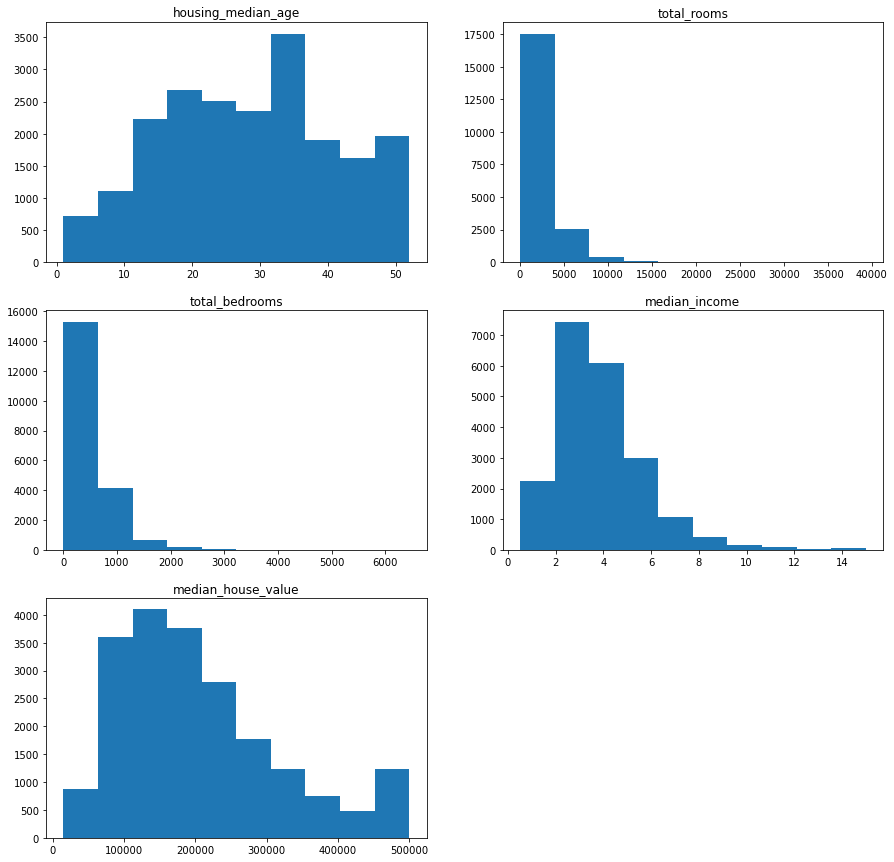

In [9]:
generate_graph('hist')

### BloxPlot de valores numéricos

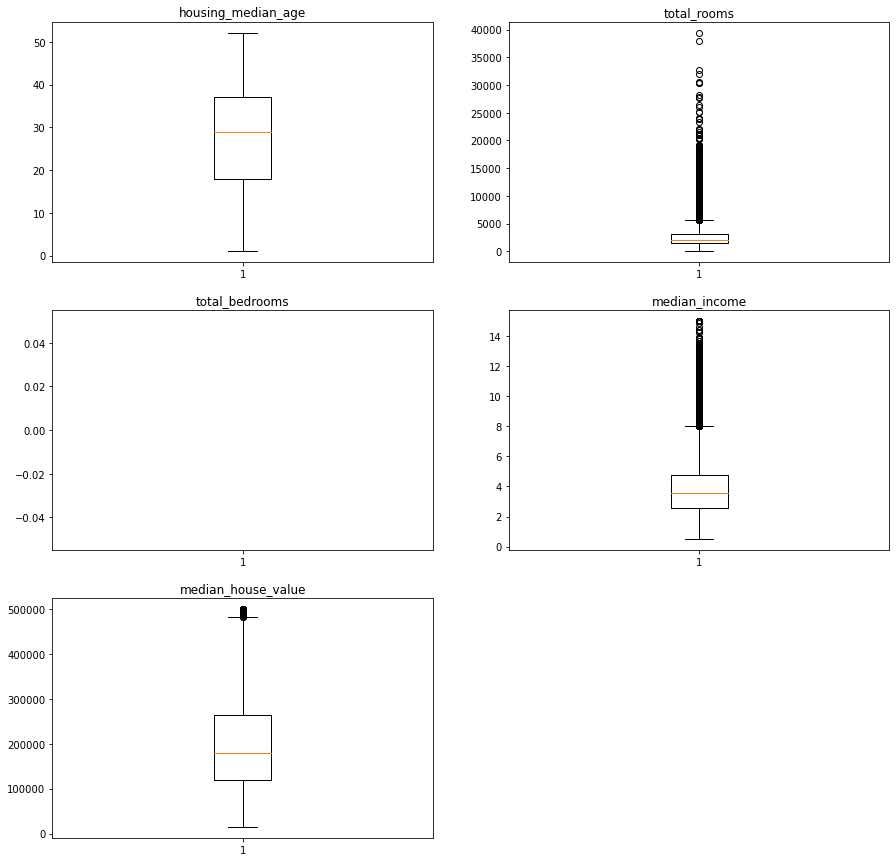

In [10]:
generate_graph('boxplot')

In [33]:
## Não foi gerado o boxlor da coluna 'total_bedrooms', pois a mesma possui valores nulos

### Correlação dos atributos numéricos com a meta

In [4]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

## Preparando dados para algortitmos de machine Learning

### Verificando dados faltantes

In [12]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Ajustando coluna ocean_proximity

In [13]:
housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [5]:
housing['ocean_proximity'] = housing['ocean_proximity'].map({'NEAR BAY': 0, '<1H OCEAN': 1, 'INLAND': 2, 'NEAR OCEAN': 3, 'ISLAND': 4})

In [15]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0


In [16]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


<!-- ### Dropando linhas com valores faltantes -->

In [6]:
housing = housing[~housing['total_bedrooms'].isnull()]
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.7 MB


### Removendo outliers

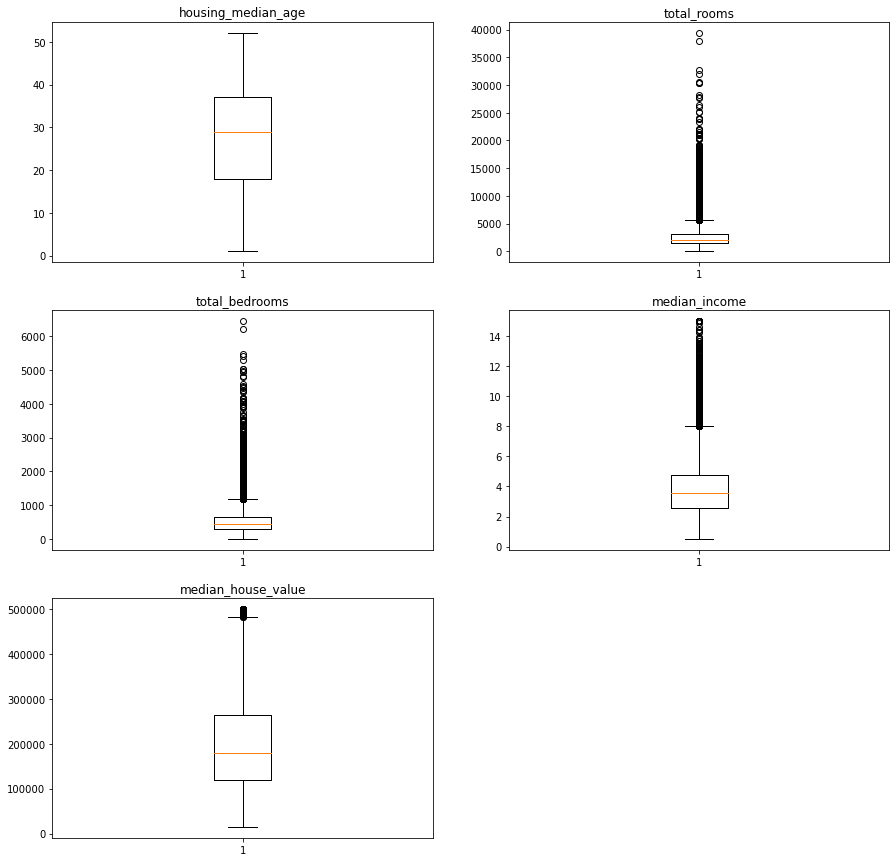

In [18]:
generate_graph('boxplot')

In [8]:
x = housing['total_bedrooms']
Q1 =  x.quantile(.25)
Q3 =  x.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ
housing = housing[x.between(limite_inferior, limite_superior)]

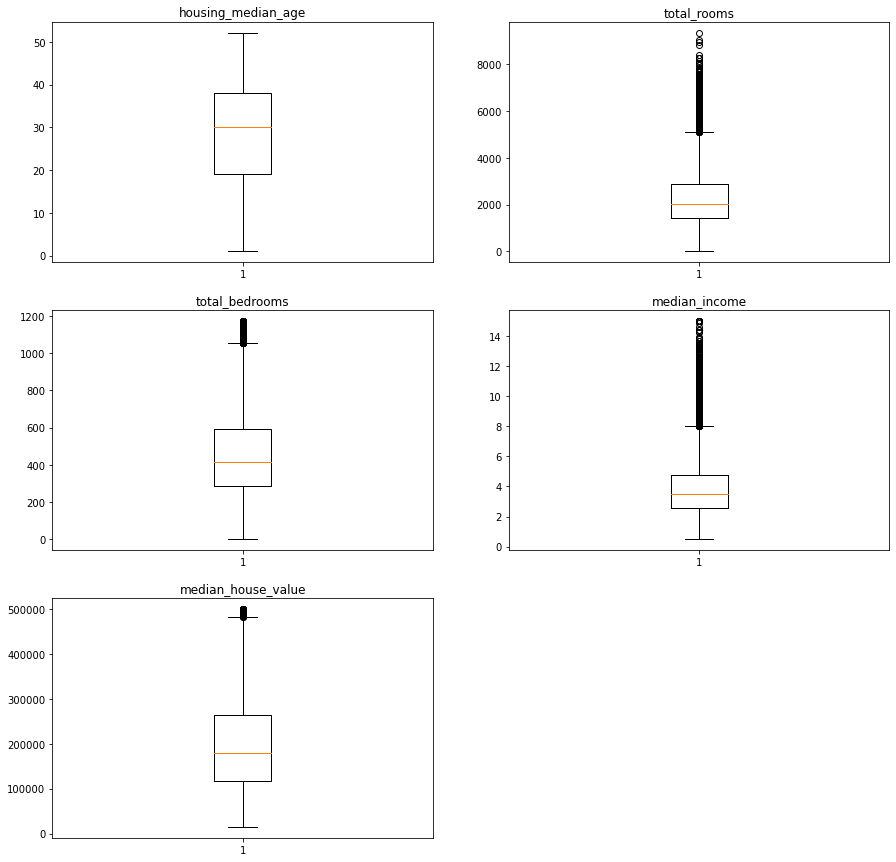

In [20]:
generate_graph('boxplot')

### Verificando a correlçao com o atributo meta, após remvoer os outliers

In [9]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.697027
total_rooms           0.203433
housing_median_age    0.110638
households            0.071681
total_bedrooms        0.050664
longitude            -0.039828
population           -0.063288
latitude             -0.149397
ocean_proximity      -0.209651
Name: median_house_value, dtype: float64

### Criando Pipeline para tratamento dos dados

In [10]:
features = housing.drop('median_house_value', axis=1)
labels = housing['median_house_value'].copy()

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

columns = features.columns.to_list()
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(columns)),
    ('std_scaler', StandardScaler()),
])

In [13]:
features_prepared = num_pipeline.fit_transform(housing)
features_prepared

array([[-1.31310331,  1.03299397,  0.92595695, ..., -1.41077283,
         2.32276436, -1.70977318],
       [-1.31810017,  1.01902344,  1.81626158, ..., -1.16412362,
         1.76628604, -1.70977318],
       [-1.32309704,  1.01902344,  1.81626158, ..., -0.96100073,
         0.92500212, -1.70977318],
       ...,
       [-0.80841997,  1.75480468, -1.01652588, ...,  0.07395872,
        -1.12992362,  0.62257607],
       [-0.85838862,  1.75480468, -0.9355891 , ..., -0.33228705,
        -1.04278822,  0.62257607],
       [-0.8184137 ,  1.72686362, -1.09746267, ...,  0.54307585,
        -0.77106336,  0.62257607]])

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [15]:
X = features_prepared
y = labels.values
split_test_size = 0.20

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size)

In [17]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train.ravel())

LinearRegression()

In [18]:
y_pred = lr_model.predict(X_test)
y_pred

array([277538.1323825 , 279033.09243235, 201858.12671187, ...,
       235309.76249918, 132226.8896518 , 200550.35040713])

In [19]:
import math
math.sqrt(mean_squared_error(y_test,y_pred))

67520.71123126493

In [20]:
lr_model.score(X_test,y_test)

0.6592635005522223